In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fide-google-efficiency-chess-ai-challenge/Screenshot 2024-10-09 at 10.45.28AM.png


In [2]:
import requests
requests.get('http://www.google.com',timeout=10).ok

!pip install --upgrade kaggle-environments
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: kaggle-environments
    Found existing installation: kaggle-environments 1.16.10
    Uninstalling kaggle-environments-1.16.10:
      Successfully uninstalled kaggle-environments-1.16.10


/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3121: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3121: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa


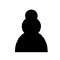
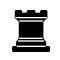
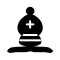
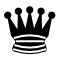
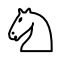
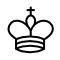
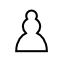
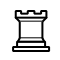
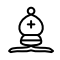
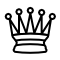
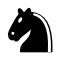
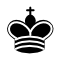

In [3]:
from kaggle_environments import make
env = make("chess", debug=True)


result = env.run(["random", "random"])
env.render(mode="ipython", width=1000, height=1000) 

In [4]:
%%writefile main.py
from Chessnut import Game
import random

def chess_bot(obs):


    game = Game(obs.board)
    moves = list(game.get_moves())

    # 1.For checkmate
    for move in moves[:10]:
        g = Game(obs.board)
        g.apply_move(move)
        if g.status == Game.CHECKMATE:
            return move

    # 2. For captures
    for move in moves:
        if game.board.get_piece(Game.xy2i(move[2:4])) != ' ':
            return move

    # 3. For queen promotions
    for move in moves:
        if "q" in move.lower():
            return move

    # 4. Random move if no checkmates or captures
    return random.choice(moves)

Writing main.py


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kaggle_environments/agent.py", line 169, in act
    action = self.agent(*args)
  File "<ipython-input-5-f5caca1ab7e9>", line 2, in my_agent
    return chess_bot(obs)
NameError: name 'chess_bot' is not defined
Error: ['Traceback (most recent call last):\n', '  File "/usr/local/lib/python3.10/dist-packages/kaggle_environments/agent.py", line 169, in act\n    action = self.agent(*args)\n', '  File "<ipython-input-5-f5caca1ab7e9>", line 2, in my_agent\n    return chess_bot(obs)\n', "NameError: name 'chess_bot' is not defined\n"]



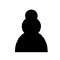
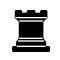
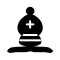
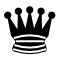
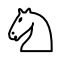
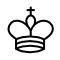
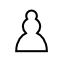
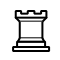
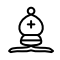
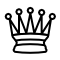
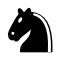
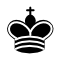

Game result:
Your agent's reward: None
Opponent's reward: 0
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kaggle_environments/agent.py", line 169, in act
    action = self.agent(*args)
  File "<ipython-input-5-f5caca1ab7e9>", line 2, in my_agent
    return chess_bot(obs)
NameError: name 'chess_bot' is not defined
Error: ['Traceback (most recent call last):\n', '  File "/usr/local/lib/python3.10/dist-packages/kaggle_environments/agent.py", line 169, in act\n    action = self.agent(*args)\n', '  File "<ipython-input-5-f5caca1ab7e9>", line 2, in my_agent\n    return chess_bot(obs)\n', "NameError: name 'chess_bot' is not defined\n"]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kaggle_environments/agent.py", line 169, in act
    action = self.agent(*args)
  File "<ipython-input-5-f5caca1ab7e9>", line 2, in my_agent
    return chess_bot(obs)
NameError: name 'chess_bot' is not defined
Error: ['Traceback (most recent ca

In [5]:
def my_agent(obs, config):
    return chess_bot(obs)

result = env.run([my_agent, "random"])

env.render(mode="ipython", width=1000, height=1000)



agent_0_reward = result[-1][0]["reward"]
agent_1_reward = result[-1][1]["reward"]

print("Game result:")
print(f"Your agent's reward: {agent_0_reward}")
print(f"Opponent's reward: {agent_1_reward}")


win_count = 0
loss_count = 0
draw_count = 0
n_games = 100  # Number of games to test
for _ in range(n_games):
    game_result = env.run([my_agent, "random"])[-1]
    reward = game_result[0]["reward"]
    if reward == 1:
        win_count += 1
    elif reward == -1:
        loss_count += 1
    else:
        draw_count += 1

print(f"Performance after {n_games} games:")
print(f"Wins: {win_count}, Losses: {loss_count}, Draws: {draw_count}")